In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import sqlalchemy

In [2]:
engine = sqlalchemy.create_engine('sqlite:///JobData.db')

jobs = pd.read_sql('Select * FROM Jobs', engine, index_col='id')

jobs_salaries = pd.read_sql(""" Select
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id""", 
engine, index_col='id')

jobs_salaries_keywords = pd.read_sql(""" Select 
t1.id, t1.job_title, t1.company, t1.location, t2.salary_type, t2.salary_period, t2.expected, t2.floor, t2.ceiling, t3.keyword 
FROM Jobs t1 INNER JOIN Salaries t2 ON t1.id = t2.id LEFT JOIN KeywordRef t3 ON t3.id = t1.id""", 
engine, index_col='id')


In [3]:
jobs

,job_title,company,location,rating_provided,rating,salary_provided,weblink,date_recorded,location_model,jurisdiction,city,country
id,,,,,,,,,,,,
cdc658d9990a63fc,Data Analyst (Banking Projects) - up to $62.00...,CorGTA Inc.,"Hybrid remote in Toronto, ON",n,NaN,y,https://ca.indeed.com/viewjob?jk=cdc658d9990a63fc,2023-11-17,Hybrid remote,ON,Toronto,Canada
cc8c9dc11f3c271f,"Business Analyst (Hybrid: North York, ON) - Re...",Enbridge Contingent Talent Community,"Hybrid remote in North York, ON",n,NaN,n,https://ca.indeed.com/viewjob?jk=cc8c9dc11f3c271f,2023-11-17,Hybrid remote,ON,North York,Canada
79507b61bd95323f,Pricing Analyst (FS/Tech/Furn),Staples Canada,"Mississauga, ON",n,NaN,n,https://ca.indeed.com/viewjob?jk=79507b61bd95323f,2023-11-17,Not Specified,ON,Mississauga,Canada
fb2e1282f0ec6e8e,Configuration Specialist/Functional Analyst,Procom,Remote in Ontario,n,NaN,n,https://ca.indeed.com/viewjob?jk=fb2e1282f0ec6e8e,2023-11-17,Remote,ON,Not Specified,Canada
1079d92e140e0d7f,Data Visualization Engineer,Motorola Solutions,"Remote in Markham, ON",n,NaN,y,https://ca.indeed.com/viewjob?jk=1079d92e140e0d7f,2023-11-17,Remote,ON,Markham,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...
6d4df9162ee64e2b,Bilingual: HR Manager / Human Resources Manager,IS2 Workforce Solutions,"Toronto, ON",n,NaN,y,https://ca.indeed.com/viewjob?jk=6d4df9162ee64e2b,2023-11-19,Not Specified,ON,Toronto,Canada
5ff5ef584a4675c9,Jr. Business & Systems Integration Analyst (We...,Plexxis Software,"Victoria, BC",n,NaN,y,https://ca.indeed.com/viewjob?jk=5ff5ef584a4675c9,2023-11-19,Not Specified,BC,Victoria,Canada
2d3dc71ad8dc0420,Market Intelligence Analyst (12-month contract),Jule,"Toronto, ON",n,NaN,n,https://ca.indeed.com/viewjob?jk=2d3dc71ad8dc0420,2023-11-19,Not Specified,ON,Toronto,Canada


In [4]:
jobs_salaries

,job_title,company,location,salary_type,salary_period,expected,floor,ceiling
id,,,,,,,,
cdc658d9990a63fc,Data Analyst (Banking Projects) - up to $62.00...,CorGTA Inc.,"Hybrid remote in Toronto, ON",range,hourly,61.00,60.00,62.00
1079d92e140e0d7f,Data Visualization Engineer,Motorola Solutions,"Remote in Markham, ON",range,yearly,75000.00,70000.00,80000.00
fbaa0c742c9095f4,Senior Data Analyst,Basis Technologies,"Remote in Toronto, ON",range,yearly,114000.00,84000.00,144000.00
edb18d98d48fef48,Data Analyst,ATW International Inc.,"York, ON",range,yearly,69826.00,40740.00,98912.00
6e63fd5ee73b1053,Data Developer and Analyst,Loyalist College,"Remote in Belleville, ON",range,hourly,44.39,41.12,47.67
...,...,...,...,...,...,...,...,...
df371ae7cd519467,Senior Business Analyst,Dawn InfoTek Inc.,"Toronto, ON",range,hourly,85.00,80.00,90.00
42fca608543f23d7,Software Engineer–Machine Learning,Workday,"Vancouver, BC",expected,yearly,112500.00,NaN,NaN
2a07a1ed1249695e,Human Resources Generalist,The Family Centre,"Edmonton, AB",range,yearly,69229.50,59238.00,79221.00


In [5]:
jobs_salaries_keywords

,job_title,company,location,salary_type,salary_period,expected,floor,ceiling,keyword
id,,,,,,,,,
cdc658d9990a63fc,Data Analyst (Banking Projects) - up to $62.00...,CorGTA Inc.,"Hybrid remote in Toronto, ON",range,hourly,61.0,60.0,62.0,data analyst
1079d92e140e0d7f,Data Visualization Engineer,Motorola Solutions,"Remote in Markham, ON",range,yearly,75000.0,70000.0,80000.0,data analyst
fbaa0c742c9095f4,Senior Data Analyst,Basis Technologies,"Remote in Toronto, ON",range,yearly,114000.0,84000.0,144000.0,business intelligence
fbaa0c742c9095f4,Senior Data Analyst,Basis Technologies,"Remote in Toronto, ON",range,yearly,114000.0,84000.0,144000.0,data analyst
fbaa0c742c9095f4,Senior Data Analyst,Basis Technologies,"Remote in Toronto, ON",range,yearly,114000.0,84000.0,144000.0,data scientist
...,...,...,...,...,...,...,...,...,...
df371ae7cd519467,Senior Business Analyst,Dawn InfoTek Inc.,"Toronto, ON",range,hourly,85.0,80.0,90.0,data analyst
42fca608543f23d7,Software Engineer–Machine Learning,Workday,"Vancouver, BC",expected,yearly,112500.0,NaN,NaN,data scientist
2a07a1ed1249695e,Human Resources Generalist,The Family Centre,"Edmonton, AB",range,yearly,69229.5,59238.0,79221.0,business intelligence


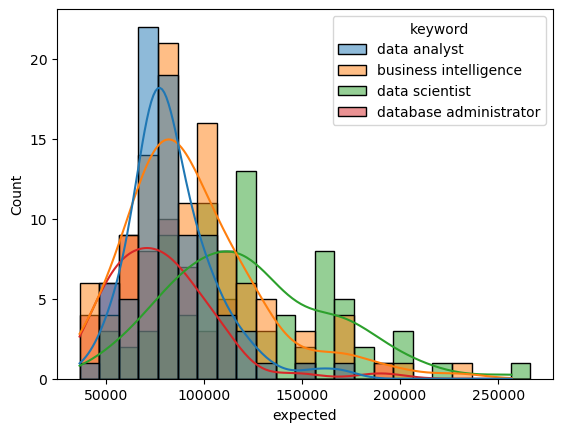

In [6]:
sns.histplot(
    data = jobs_salaries_keywords[jobs_salaries_keywords['salary_period']=='yearly'], x='expected', hue = 'keyword', kde = True, binwidth = 10000
)